In [1]:
!pip install mysql-connector-python pandas


   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   -------------- ------------------------- 6.0/16.5 MB 45.3 MB/s eta 0:00:01
   ---------------------------------------- 16.5/16.5 MB 62.6 MB/s eta 0:00:00


In [3]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(
        host='localhost',             # because Workbench runs locally
        database='incubator_tracker', # the DB created by your seed.sql
        user='root',                  # or the MySQL user you created
        password='01042003',     # your MySQL Workbench password
        auth_plugin='mysql_native_password'
    )

    if connection.is_connected():
        print("Connected to MySQL Server")

except Error as e:
    print("Error while connecting:", e)


Connected to MySQL Server


In [5]:
# Query 1: Top 10 startups by total funding received
import pandas as pd
cursor = connection.cursor()
q1 = '''
SELECT s.startup_id, s.name AS startup_name,
       COALESCE(SUM(fr.amount), 0) AS total_funding,
       COUNT(fr.funding_id) AS num_rounds
FROM Startup s
LEFT JOIN FundingRound fr ON fr.startup_id = s.startup_id
GROUP BY s.startup_id, s.name
ORDER BY total_funding DESC
LIMIT 10;
'''
cursor.execute(q1)
rows1 = cursor.fetchall()

df_top_startups = pd.DataFrame(rows1, columns=['startup_id','startup_name','total_funding','num_rounds'])
df_top_startups   # ← This will display the table


,startup_id,startup_name,total_funding,num_rounds
0,47,SparkWorks47,6163067.00,5
1,70,BetaApps70,4640394.00,2
2,73,AlphaLabs73,4567806.00,5
3,93,EcoSystems93,4270085.00,3
4,74,AlphaWorks74,4080746.00,3
5,14,NextLabs14,3740752.00,6
6,36,OmniSolutions36,3636773.00,3
7,38,OmniSolutions38,3582585.00,1
8,58,AlphaLabs58,3422674.00,6
9,102,BlueWorks102,3352218.00,3


In [7]:
# Query 2: Top mentors by number of startups they mentor
cursor = connection.cursor()

q2 = '''
SELECT m.mentor_id, p.name AS mentor_name, COUNT(sm.startup_id) AS startups_mentored
FROM Mentor m
JOIN People p ON p.person_id = m.person_id
LEFT JOIN StartupMentor sm ON sm.mentor_id = m.mentor_id
GROUP BY m.mentor_id, p.name
ORDER BY startups_mentored DESC
LIMIT 20;
'''

cursor.execute(q2)
rows2 = cursor.fetchall()

df_top_mentors = pd.DataFrame(rows2, columns=['mentor_id','mentor_name','startups_mentored'])
df_top_mentors   # ← displays table normally in Jupyter


,mentor_id,mentor_name,startups_mentored
0,58,Josephine White,6
1,22,Abigail Scott,5
2,25,Everly Thomas,5
3,69,Stella Hill,5
4,4,Grace Thomas,4
5,12,Samantha Perez,4
6,14,Grace White,4
7,30,Sofia Thomas,4
8,59,Claire Cruz,4
9,8,Irene Taylor,4


In [10]:
# Query 3: Event participation counts (distinct entrepreneurs, startups) per event

cursor = connection.cursor()

q3 = '''
SELECT e.event_id, e.title AS event_title, e.event_date,
       COUNT(DISTINCT ee.entrepreneur_id) AS entrepreneurs_attended,
       COUNT(DISTINCT se.startup_id) AS startups_participated
FROM Event e
LEFT JOIN EntrepreneurEvent ee ON ee.event_id = e.event_id
LEFT JOIN StartupEvent se ON se.event_id = e.event_id
GROUP BY e.event_id, e.title, e.event_date
ORDER BY entrepreneurs_attended DESC, startups_participated DESC
LIMIT 30;
'''

cursor.execute(q3)
rows3 = cursor.fetchall()

df_events = pd.DataFrame(
    rows3,
    columns=[
        'event_id', 'event_title', 'event_date',
        'entrepreneurs_attended', 'startups_participated'
    ]
)

df_events  


,event_id,event_title,event_date,entrepreneurs_attended,startups_participated
0,8,Boston Pitch Day 8,2025-10-08,11,7
1,26,Student Investor Networking 26,2020-04-27,7,7
2,27,MIT Pitch Day 27,2019-06-23,7,5
3,32,MIT Workshop 32,2021-11-14,6,7
4,30,NU Bootcamp 30,2020-05-24,6,6
5,19,Student Investor Networking 19,2022-03-20,6,5
6,45,Harvard Workshop 45,2021-05-19,6,3
7,31,Boston Demo Night 31,2020-10-25,6,3
8,23,NU Demo Night 23,2023-11-03,6,2
9,20,Student Investor Networking 20,2024-04-02,6,1


Total funding across top 10 startups: 41457100.00
Average number of funding rounds (top 10 startups): 3.70
Median number of startups mentored (top mentors): 4.0


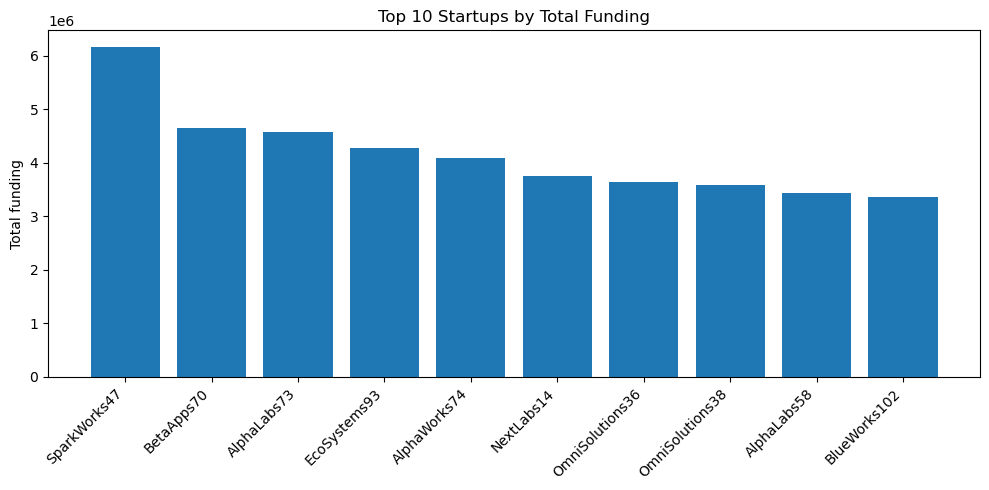

In [11]:
# Simple analytics based on retrieved data
import matplotlib.pyplot as plt

# 1) Total funding across top startups
total_top_funding = df_top_startups['total_funding'].sum()
print(f"Total funding across top 10 startups: {total_top_funding}")

# 2) Average number of rounds for top startups
avg_rounds = df_top_startups['num_rounds'].mean()
print(f"Average number of funding rounds (top 10 startups): {avg_rounds:.2f}")

# 3) Median startups mentored (top mentors)
median_mentored = df_top_mentors['startups_mentored'].median()
print(f"Median number of startups mentored (top mentors): {median_mentored}")

# 4) Simple bar chart: top 10 startups by funding
plt.figure(figsize=(10,5))
plt.bar(df_top_startups['startup_name'], df_top_startups['total_funding'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Startups by Total Funding')
plt.ylabel('Total funding')
plt.tight_layout()
plt.show()


In [12]:
# Close cursor and connection
cursor.close()
connection.close()
print("Closed database connection.")


Closed database connection.
